In [ ]:
import pandas as pd
import numpy as np
import nltk
from random import randrange

In [ ]:
quotes= pd.read_excel("https://github.com/superchromat/artificial-intelligence/blob/main/web%20app/BQ.xlsx?raw=true")
quotes

,Quote
0,"""Your task is not to seek for love, but merely..."
1,"""Out beyond ideas of wrongdoing and rightdoing..."
2,"""Where there is ruin, there is hope for a trea..."
3,“When the soul lies down in that grass the wor...
4,"""If you are irritated by every rub, how will y..."
...,...
333,“Let the beauty we love be what we do. There a...
334,“If I can only recount the story of my life r...
335,“Observe the wonders as they occur around you....
336,"“Body of earth, don't talk of earth Tell the s..."


Import Natural Language Toolkit (nltk) and the Sentiment Intensity Analyzer package.
More information can be found on: 
https://github.com/cjhutto/vaderSentiment

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.



In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# instantiate the SIA
sid = SentimentIntensityAnalyzer()
all_compounds = []
# loop through each one of the quotes
for sentence in quotes['Quote']:
  print(sentence)
  # call the polarity scores
  ss = sid.polarity_scores(sentence)
  for i in sorted(ss):
    print('{0}: {1}, '.format(i, ss[i]), end='')
    print()

    if i == 'compound':
      all_compounds.append(ss[i])

"Your task is not to seek for love, but merely to seek and find all the barriers within yourself that you have built against it."
compound: 0.3818, 
neg: 0.0, 
neu: 0.902, 
pos: 0.098, 
"Out beyond ideas of wrongdoing and rightdoing there is a field. I'll meet you there.”
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
"Where there is ruin, there is hope for a treasure."
compound: -0.2263, 
neg: 0.277, 
neu: 0.511, 
pos: 0.212, 
“When the soul lies down in that grass the world is too full to talk about."
compound: -0.4215, 
neg: 0.157, 
neu: 0.843, 
pos: 0.0, 
"If you are irritated by every rub, how will your mirror be polished?"
compound: -0.4588, 
neg: 0.2, 
neu: 0.8, 
pos: 0.0, 
"The minute I heard my first love story, I started looking for you, not knowing how blind that was.”
compound: 0.7549, 
neg: 0.0, 
neu: 0.699, 
pos: 0.301, 
 “Lovers don't finally meet somewhere. They're in each other all along."
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
"You were born with wings, wh

In [ ]:
# print the first 10 compound scores
all_compounds[0:10]

[0.3818, 0.0, -0.2263, -0.4215, -0.4588, 0.7549, 0.0, 0.0, 0.0, -0.8934]

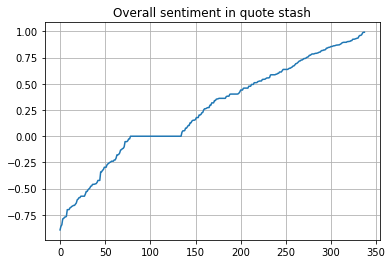

In [ ]:
# plot the scores
import matplotlib.pyplot as plt
plt.plot(sorted(all_compounds))
plt.title('Overall sentiment in quote stash')
plt.grid()

Based on the distribution above the sentiments are mostly positive, with a few neutrals and some negatives.

Let's look at some examples

In [ ]:
# pass in the compound scores as a new column in the dataframe
quotes['sentiment_score'] = all_compounds
quotes.head()

,Quote,sentiment_score
0,"""Your task is not to seek for love, but merely...",0.3818
1,"""Out beyond ideas of wrongdoing and rightdoing...",0.0000
2,"""Where there is ruin, there is hope for a trea...",-0.2263
3,“When the soul lies down in that grass the wor...,-0.4215
4,"""If you are irritated by every rub, how will y...",-0.4588


In [ ]:
# to compare scores
# the most negative score
print(np.min(quotes['sentiment_score']))
# most positive
print(np.max(quotes['sentiment_score']))

-0.8934
0.9915


In [ ]:
# the most negative
quotes[quotes['sentiment_score'] == np.min(quotes['sentiment_score'])]

,Quote,sentiment_score
9,"""Ignore those that make you fearful and sad, t...",-0.8934


In [ ]:
# the most positive
quotes[quotes['sentiment_score'] == np.max(quotes['sentiment_score'])]

,Quote,sentiment_score
80,"""When the rose is gone and the garden faded yo...",0.9915


In [ ]:
# to see the entire quote, add ['Quote'].values
quotes[quotes['sentiment_score'] == np.max(quotes['sentiment_score'])]['Quote'].values

array(['"When the rose is gone and the garden faded you will no longer hear the nightingale\'s song. The Beloved is all; the lover just a veil. The Beloved is living; the lover a dead thing. If love withholds its strengthening care, the lover is left like a bird without care, the lover is left like a bird without wings. How will I be awake and aware if the light of the Beloved is absent? Love wills that this Word be brought forth."'],
      dtype=object)

Now we can create the quote movement.
* Load the quote stash and assign index scores
* handle user requests for new quotes, up or down on thr sentiment ladder

In [ ]:
# create a function to load the quote stash
# this function will only be called once when you restart the server

# declare global variable
quotes = None
# function
def prepare_sentiment_quote_stash(quote_stash_path):
  global quotes
  # load quote stash
  quotes = pd.read_excel("https://github.com/superchromat/artificial-intelligence/blob/main/web%20app/BQ.xlsx?raw=true")
  # instantiate the analyzer
  sid = SentimentIntensityAnalyzer()#
  # create a list to store the compound scores
  all_compounds = []
  # loop through each one of the quotes
  for sentence in quotes['Quote']:
    print(sentence)
    # call the polarity scores
    ss = sid.polarity_scores(sentence)
    for i in sorted(ss):
      print('{0}: {1}, '.format(i, ss[i]), end='')
      print()

      if i == 'compound':
        all_compounds.append(ss[i])
  #
  # add sentiment to the data
  quotes['sentiment_score'] = all_compounds

  # create ladder index
  quotes = quotes.sort_values('sentiment_score')
  quotes['index'] = [ix for ix in range(0, len(quotes))]
  return quotes

In [ ]:
# run the program
prepare_sentiment_quote_stash('BQ.xlsx')#
quotes.head()

"Your task is not to seek for love, but merely to seek and find all the barriers within yourself that you have built against it."
compound: 0.3818, 
neg: 0.0, 
neu: 0.902, 
pos: 0.098, 
"Out beyond ideas of wrongdoing and rightdoing there is a field. I'll meet you there.”
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
"Where there is ruin, there is hope for a treasure."
compound: -0.2263, 
neg: 0.277, 
neu: 0.511, 
pos: 0.212, 
“When the soul lies down in that grass the world is too full to talk about."
compound: -0.4215, 
neg: 0.157, 
neu: 0.843, 
pos: 0.0, 
"If you are irritated by every rub, how will your mirror be polished?"
compound: -0.4588, 
neg: 0.2, 
neu: 0.8, 
pos: 0.0, 
"The minute I heard my first love story, I started looking for you, not knowing how blind that was.”
compound: 0.7549, 
neg: 0.0, 
neu: 0.699, 
pos: 0.301, 
 “Lovers don't finally meet somewhere. They're in each other all along."
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
"You were born with wings, wh

,Quote,sentiment_score,index
9,"""Ignore those that make you fearful and sad, t...",-0.8934,0
182,“If the wine drinker\nhas a deep gentleness in...,-0.8591,1
250,“We were green: we ripened and grew golden. \n...,-0.8442,2
267,“Darkness may hide the trees and the flowers f...,-0.7877,3
240,“Without you the instruments would die.\nOne s...,-0.7845,4


Handle user requests for new quotes on the sentiment ladder.

In [ ]:
max_index_value = np.max(quotes['index'].values)

# this function is called when a user opens the webpage or when the user calls for another quote
def gimme_a_quote(direction = None, current_index = None):
    # calls a random number between 0 and the max index value
    # and holds it just in case
    rand_index = randrange(max_index_value)
    # brighter and darker are the directions we want to move within
    darker = None
    brighter = None 
    
    # New session visit
    if current_index is None:
        brighter = rand_index
    # if they want a happier quote  
    if direction == 'brighter':
        brighter = current_index    
    else:
        darker = current_index
    # if they want a darker quote
    # this is a placeholder     
    if darker is not None:
        current_index = rand_index
        # check
        try:
            # in flask you have to make sure it casts to an integer
            current_index = int(darker)
        except ValueError:
            # somebody is gaming the system
            current_index = rand_index

        # since the lowest value in the index is 0 we have to catch situations where#
        # user is trying to go lower   
        if current_index > 0:
            # try for a lesser value than current one
            rand_index = randrange(0, current_index)
            # this print statement is just for the debugger
            print('darker')
        else:
            # already at lowest point so assign a new random of full set
            rand_index = rand_index

    # now we do the same in the other direction
    elif brighter is not None:

        try:
            current_index = int(brighter)
        except ValueError:
            # somebody is gaming the system
            current_index = rand_index

        # try for a higher value than current one
        if current_index < max_index_value -1:
            rand_index = randrange(current_index, max_index_value)
            print('brighter')
        else:
            # already at highest point so assign a new random of full set
            rand_index = rand_index

    else:
        # grab a random value
        rand_index = rand_index
        
    return (rand_index)
        
# test the function
gimme_a_quote('darker', 20)  

darker


6

In [ ]:
quotes[quotes['index'] == gimme_a_quote('brighter', 34)]

brighter


,Quote,sentiment_score,index
112,"“Come, come, whoever you are. Wanderer, worshi...",0.5556,230


In [ ]:
quotes[quotes['index'] == gimme_a_quote('darker', 49)]

darker


,Quote,sentiment_score,index
307,"“And patience flees my heart, And reason flees...",-0.5859,21


In [ ]:
Image(filename='flask-folder-structure.png', width='500px~')

NameError: ignored